## Problem Statement

Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19. So, the analysis intends to shed light on the socio-economic consequences of the pandemic on India's workforce and labor market.

This dataset aids in comprehending the unemployment dynamics across India's states during the COVID-19 crisis. It offers valuable insights into how the unemployment rate, employment figures, and labor participation rates have been impacted across different regions in the country.

In [2]:
#Filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [4]:
#Reading the data set 
df = pd.read_csv("Unemployment in India.csv")

In [5]:
#Seeing the first five rows
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

In [7]:
df.shape

(768, 7)

Dataset has 768 rows and 7 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


Out of 768 rows, 740 are non null rows.

In [9]:
#Checking for null percentage

round(df.isnull().sum()/df.shape[0]*100,2)

Region                                      3.65
 Date                                       3.65
 Frequency                                  3.65
 Estimated Unemployment Rate (%)            3.65
 Estimated Employed                         3.65
 Estimated Labour Participation Rate (%)    3.65
Area                                        3.65
dtype: float64

Since the null percentage is less than 5, we shall delete the rows with null values as it will not affect our analysis.

In [10]:
# Delecting the null rows

df.dropna(inplace = True)

df.shape

(740, 7)

There were 28 null rows and we deleted it and are left with 740 rows for our analysis.

In [11]:
#checking for null percentage

df.isnull().sum()/df.shape[0]

Region                                      0.0
 Date                                       0.0
 Frequency                                  0.0
 Estimated Unemployment Rate (%)            0.0
 Estimated Employed                         0.0
 Estimated Labour Participation Rate (%)    0.0
Area                                        0.0
dtype: float64

In [12]:
# We shall rename the columns for easier access
df = df.rename(columns={' Date' : 'Date',' Frequency': 'Frequency' ,' Estimated Unemployment Rate (%)' : 'Est_Unemp_Rate', ' Estimated Employed' : 'Est_Emp_Rate',
                          ' Estimated Labour Participation Rate (%)' : 'Est_Labour_Rate'}).reset_index(drop = True)


# Rounding estimated employed column for a better visualizing

df['Est_Emp_Rate'] = round((df['Est_Emp_Rate']/1000000),2)

df.head()

,Region,Date,Frequency,Est_Unemp_Rate,Est_Emp_Rate,Est_Labour_Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,12.00,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11.76,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12.09,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12.29,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12.26,44.68,Rural


In [13]:
# Changing the dtype of 'Date' column

df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Region           740 non-null    object        
 1   Date             740 non-null    datetime64[ns]
 2   Frequency        740 non-null    object        
 3   Est_Unemp_Rate   740 non-null    float64       
 4   Est_Emp_Rate     740 non-null    float64       
 5   Est_Labour_Rate  740 non-null    float64       
 6   Area             740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 40.6+ KB


In [14]:
#checking if there are no duplicate rows in the data set 

df.duplicated().sum()

0

In [15]:
# Important to note that there is a typo in the 'Frequency' column

df.Frequency.value_counts()

Monthly     381
 Monthly    359
Name: Frequency, dtype: int64

In [16]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Est_Unemp_Rate', 'Est_Emp_Rate',
       'Est_Labour_Rate', 'Area'],
      dtype='object')

Since both the values represent the same thing and there is only typo error we can delete the Frequency column as it is insignificant for our analysis.

In [17]:
df = df.drop(['Frequency'],axis = 1)

df.shape

(740, 6)

In [18]:
#We shall create a new column for year and month to analyse the between 2019 and 2020

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.head()

,Region,Date,Est_Unemp_Rate,Est_Emp_Rate,Est_Labour_Rate,Area,Year,Month
0,Andhra Pradesh,2019-05-31,3.65,12.00,43.24,Rural,2019,5
1,Andhra Pradesh,2019-06-30,3.05,11.76,42.05,Rural,2019,6
2,Andhra Pradesh,2019-07-31,3.75,12.09,43.50,Rural,2019,7
3,Andhra Pradesh,2019-08-31,3.32,12.29,43.97,Rural,2019,8
4,Andhra Pradesh,2019-09-30,5.17,12.26,44.68,Rural,2019,9


Now there are 8 columns in the data set to be analyzed.

In [19]:
#Analysing the Area column

df.Area.value_counts(normalize = True)*100

Urban    51.486486
Rural    48.513514
Name: Area, dtype: float64

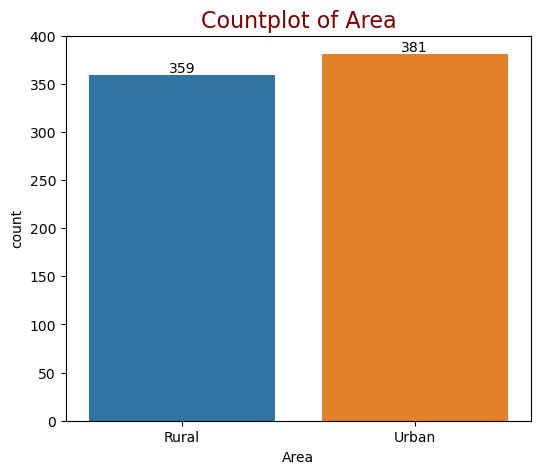

In [23]:
plt.figure(figsize = [6,5])
ax = sns.countplot(data = df, x = 'Area')

plt.title("Countplot of Area", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Maroon'})
for x in ax.containers:
        ax.bar_label(x,rotation=0)

plt.show()

We have alomst 50% data from both Rural and Urban Areas. Also we should note the Urban areas have high unemployment rate as compared to Rural area.


In [209]:
#Analyzing the Region column
df.Region.value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

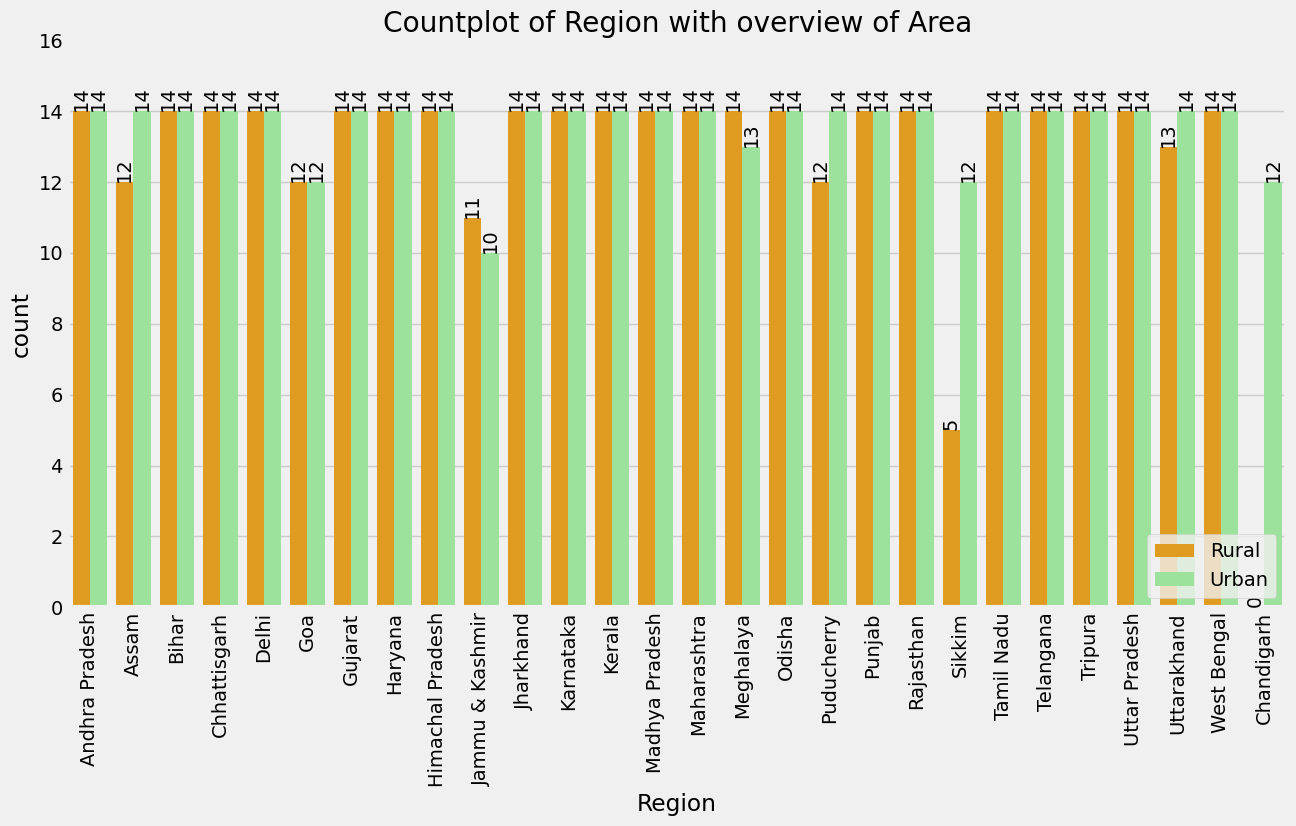

In [28]:
plt.figure(figsize=(14,7))
plt.style.use('fivethirtyeight')
ax = sns.countplot( x=df['Region'],hue = df['Area'], palette = ['orange','lightgreen'] )
plt.legend(loc = 'lower right')

for x in ax.containers:
        ax.bar_label(x,rotation=90)
        
plt.xticks(rotation=90)
plt.ylim(0,16)
plt.title('Countplot of Region with overview of Area')
plt.show()

Majority of the states have an equal share of unemployment rate in Rural as well as Urban areas.

Sikkim has the lowest unemployment rate in Rural areas

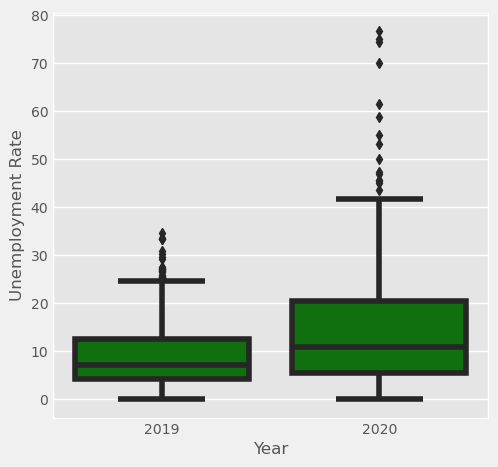

In [211]:
#Analysing the Unemployment Rate column
plt.figure(figsize=(5,5))
plt.style.use('ggplot')
sns.boxplot(y = df['Est_Unemp_Rate'], x = df['Year'], color ='green')
plt.ylabel('Unemployment Rate')
plt.show()

There are no outliers. Due to Covid-19 pandemic, there was sudden increase in the Unemployment Rate in 2020 due to Lockdown.

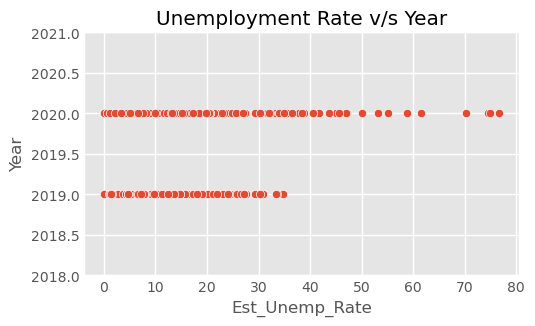

In [212]:
plt.figure(figsize=(5,3))
plt.style.use('ggplot')
sns.scatterplot(x = df['Est_Unemp_Rate'], y = df['Year'])
plt.ylim(2018,2021)
plt.title('Unemployment Rate v/s Year')
plt.show()

We can clearly see that in 2020 there was an increase in the unemployment rate after the rise of Covid-19.

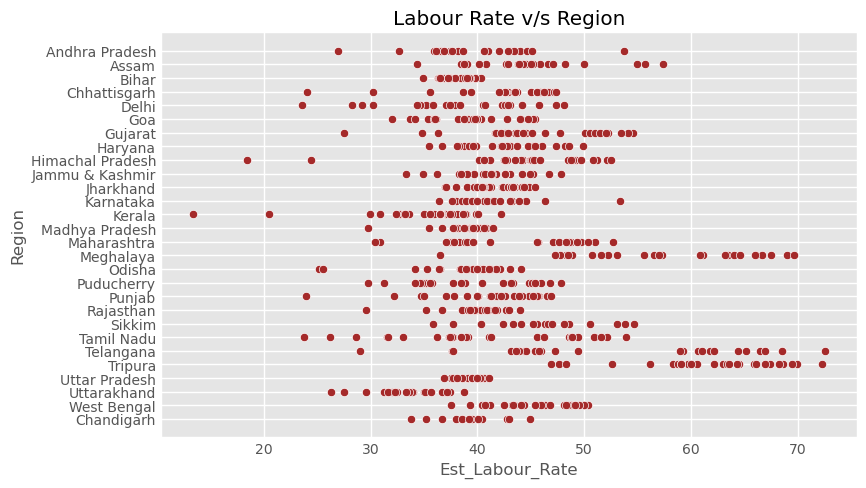

In [213]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.scatterplot(x = df['Est_Labour_Rate'], y = df['Region'], color = 'brown')
plt.title('Labour Rate v/s Region')
plt.show()

Meghalaya, Tripura and Telangana have high Labour rate.

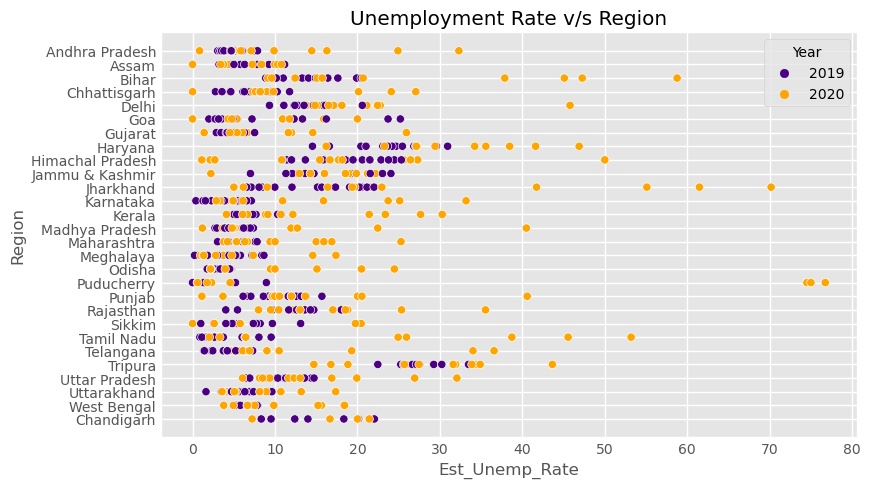

In [214]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.scatterplot(x = df['Est_Unemp_Rate'], y = df['Region'], hue = df['Year'], palette =['indigo','orange'])
plt.title('Unemployment Rate v/s Region')
plt.show()

In 2019, unemployment rate was less as compared to 2020. Also in Puducherry,Jharkhand, Bihar the unemployement rate increased in 2020 due to pandemic.

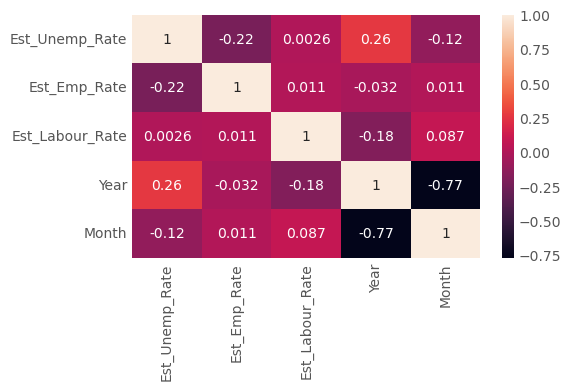

In [215]:
#correlation heatmap
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(),annot=True)
plt.show()

We can see that Year and Unemployment have a positive correlation between them.

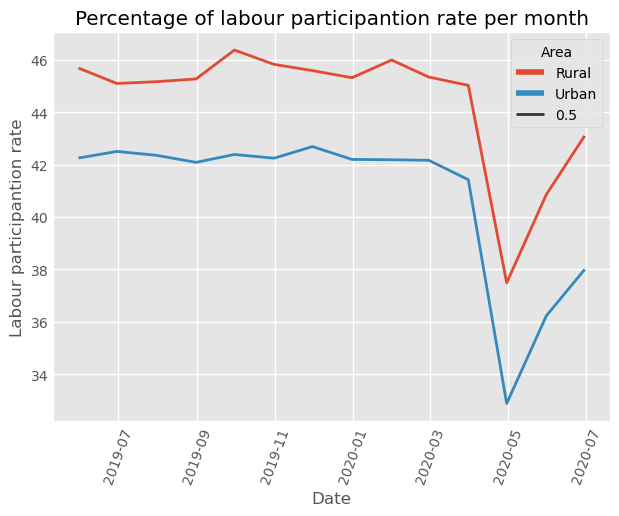

In [216]:
sns.lineplot(data=df, x='Date', y='Est_Labour_Rate', hue='Area', errorbar= None, size = 0.5)
plt.title('Percentage of labour participantion rate per month')
plt.ylabel('Labour participantion rate')
plt.xticks(rotation= 70)
plt.show()

The graph shows a steep decline in the labour partcipation during the time when pandemic was at its peak in both areas. But in Urban areas there is a much degradation than in rural areas.